In [1]:
pip install requests beautifulsoup4 requests-html

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=625397b22179ce06c22670c10fef5865f84c54fa7f4d56552ce13414119f3a1b
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [2]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [3]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

In [4]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [5]:
skysports_url = 'https://www.skysports.com/football/news'
hyperlinks = parse_elements(skysports_url, 'a')

In [6]:
# Print the string versions of the hyperlinks
links_list = []
for hyperlink in hyperlinks:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count('/football/news/') > 0:
        #print("count is greater")
        if (hyperlink.absolute_links).pop() not in links_list:
          #print('not in list')
          links_list.append(((hyperlink.absolute_links).pop()))
          print((hyperlink.absolute_links).pop())


def get_threads(webdata,name):
  for hyperlink in webdata:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count(f'/football/{name}/') > 0:
        print((hyperlink.absolute_links).pop())
      #let's add some code to add each hyperlink to a list!
      #then we can add the list to a dictionary and make it a pandas dataframe

https://www.skysports.com/football/news/topic/8724/black-lives-matter
https://www.skysports.com/football/news/topic/9087/south-asians-in-football
https://www.skysports.com/football/news/11095/13025288/ange-postecoglou-tottenham-manager-bemoans-teams-lack-of-conviction-as-spurs-throw-away-lead-to-lose-to-west-ham
https://www.skysports.com/football/news/11678/13025287/newcastle-eddie-howe-rues-absence-of-attacking-options-as-tired-magpies-lose-at-everton
https://www.skysports.com/football/news/topic/8218/reports-and-highlights
https://www.skysports.com/football/news/11667/13025186/erik-ten-hag-manchester-united-manager-was-told-by-friends-not-to-take-old-trafford-job-as-he-couldnt-succeed-in-the-role
https://www.skysports.com/football/news/11095/13025044/steve-cooper-nottingham-forest-expected-to-sack-manager-if-they-lose-at-wolves
https://www.skysports.com/football/news/11688/12768726/championship-the-things-you-need-to-know-this-weekend
https://www.skysports.com/football/news/11095/130

In [7]:
links_list

['https://www.skysports.com/football/news/topic/8724/black-lives-matter',
 'https://www.skysports.com/football/news/topic/9087/south-asians-in-football',
 'https://www.skysports.com/football/news/11095/13025288/ange-postecoglou-tottenham-manager-bemoans-teams-lack-of-conviction-as-spurs-throw-away-lead-to-lose-to-west-ham',
 'https://www.skysports.com/football/news/11678/13025287/newcastle-eddie-howe-rues-absence-of-attacking-options-as-tired-magpies-lose-at-everton',
 'https://www.skysports.com/football/news/topic/8218/reports-and-highlights',
 'https://www.skysports.com/football/news/11667/13025186/erik-ten-hag-manchester-united-manager-was-told-by-friends-not-to-take-old-trafford-job-as-he-couldnt-succeed-in-the-role',
 'https://www.skysports.com/football/news/11095/13025044/steve-cooper-nottingham-forest-expected-to-sack-manager-if-they-lose-at-wolves',
 'https://www.skysports.com/football/news/11688/12768726/championship-the-things-you-need-to-know-this-weekend',
 'https://www.sky

In [8]:
threads_dictionary = {}
for link in links_list:
  content = parse_elements(link, 'body')
  threads_dictionary[link] = content.pop()

In [9]:
threads_dictionary

{'https://www.skysports.com/football/news/topic/8724/black-lives-matter': <Element 'body' >,
 'https://www.skysports.com/football/news/topic/9087/south-asians-in-football': <Element 'body' >,
 'https://www.skysports.com/football/news/11095/13025288/ange-postecoglou-tottenham-manager-bemoans-teams-lack-of-conviction-as-spurs-throw-away-lead-to-lose-to-west-ham': <Element 'body' class=() data-component-name='sdc-base-element-filter' data-element-filter-rules='[{"selector":".site-footer [href*=\\"sky-sports-racing\\"]","objectProperty":"window.SKY_SPORTS.user.isWholesale","objectPropertyValue":true,"hideParent":true}]'>,
 'https://www.skysports.com/football/news/11678/13025287/newcastle-eddie-howe-rues-absence-of-attacking-options-as-tired-magpies-lose-at-everton': <Element 'body' class=() data-component-name='sdc-base-element-filter' data-element-filter-rules='[{"selector":".site-footer [href*=\\"sky-sports-racing\\"]","objectProperty":"window.SKY_SPORTS.user.isWholesale","objectProperty

In [10]:
def topic_detection(sentence):
    PremierLeague_words = ('England', 'Premier League','FA Cup', 'Arsenal','Aston Villa', 'Brentford', 'Brighton', 'Bournemouth', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Man City', 'Manchester City', 'Man Utd', 'Manchester United', 'Newcastle', 'Newcastle United', 'Nottingham Forest', 'Sheffield United', 'Spurs', 'Tottenham Hotspur', 'West Ham Utd.', 'West Ham', 'Wolves', 'Wolverhampton', 'Wanderers', 'Wigan Athletic')
    LaLiga_words = ('Spain', 'La Liga', 'Alavés', 'Almería', 'Athletic Club', 'Atlético Madrid', 'Madrid', 'Barcelona', 'Betis', 'Cádiz', 'Celta Vigo', 'Getafe', 'Girona', 'Granada', 'Las Palmas', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Villarreal')
    SeriesA_Words = ('Italy', 'Series A', 'Milan','Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Hellas Verona', 'Inter Milan', 'Juventus', 'Lazio', 'Lecce', 'AC Milan', 'Monza', 'Napoli', 'Roma', 'Salernitana', 'Sassuolo', 'Torino', 'Udinese')
    PremierLeague = any(sentence.count(i) > 0 for i in PremierLeague_words)
    LaLiga = any(sentence.count(i) > 0 for i in LaLiga_words)
    SeriesA = any(sentence.count(i) > 0 for i in SeriesA_Words)
    topics = []
    if PremierLeague == True:
        topics.append("PremierLeague")
    if LaLiga == True:
        topics.append("LaLiga")
    if SeriesA == True:
        topics.append("SeriesA")
    return topics

In [11]:
url = 'https://www.skysports.com/football/news/11854/13024960/paul-pogba-former-man-utd-and-juventus-midfielder-faces-up-to-four-year-ban-after-testing-positive-for-testosterone'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [14]:
type(paragraphs[0])

requests_html.Element

In [20]:
#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
topic_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      print((paragraphs[p].text))
      print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}")
      p_list.append(paragraphs[p].text)
      topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

Former Man Utd midfielder Paul Pogba could face up to four-year ban after testing positive for testosterone; counter-analysis results also returned positive
TALKS ABOUT: ['PremierLeague']
Anti-doping prosecutors in Italy have requested a maximum four-year ban for Juventus midfielder Paul Pogba after the World Cup winner tested positive for testosterone.
TALKS ABOUT: ['SeriesA']
Pogba opted not to make a plea bargain with Italy's anti-doping agency, meaning the case will be tried before the country's anti-doping court. At the age of 30, a four-year ban could end Pogba's career.
TALKS ABOUT: ['SeriesA']
Four-year bans are standard under the World Anti-Doping Code but can be reduced in cases where an athlete can prove their doping was unintentional, if the positive test was a result of contamination or if they provide 'substantial assistance' to help investigators.
TALKS ABOUT: []
Pogba's positive test was announced in September, stemming from an exam that was carried out after Juventus' 

In [21]:
p_dictionary['Topics']

[['PremierLeague'], ['SeriesA'], ['SeriesA'], [], ['SeriesA'], [], [], []]

In [22]:
soccer_df = pd.DataFrame(p_dictionary)

In [23]:
soccer_df.head(20)

,Paragraphs,Topics
0,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague]
1,Anti-doping prosecutors in Italy have requeste...,[SeriesA]
2,Pogba opted not to make a plea bargain with It...,[SeriesA]
3,Four-year bans are standard under the World An...,[]
4,Pogba's positive test was announced in Septemb...,[SeriesA]
5,The midfielder asked for counter-analysis to b...,[]
6,It emerged that DHEA was the substance discove...,[]
7,"The Super 6 Christmas Rollover hits £500,000! ...",[]


In [24]:
soccer_df2 = pd.DataFrame({'Paragraph_Elements':paragraphs})

In [25]:
soccer_df2.head()

,Paragraph_Elements
0,<Element 'p' class=('sdc-site-localnav__header...
1,<Element 'p' class=('sdc-article-header__sub-t...
2,<Element 'p' class=('sdc-article-date__date-ti...
3,<Element 'p' >
4,<Element 'p' >


In [26]:
soccer_df2['Paragraph_Text'] = soccer_df2['Paragraph_Elements'].apply(lambda x:x.text)

In [27]:
soccer_df2.head()

,Paragraph_Elements,Paragraph_Text
0,<Element 'p' class=('sdc-site-localnav__header...,Football
1,<Element 'p' class=('sdc-article-header__sub-t...,Former Man Utd midfielder Paul Pogba could fac...
2,<Element 'p' class=('sdc-article-date__date-ti...,"Thursday 7 December 2023 13:44, UK"
3,<Element 'p' >,Anti-doping prosecutors in Italy have requeste...
4,<Element 'p' >,Pogba opted not to make a plea bargain with It...


In [28]:
soccer_df2['Topics'] = soccer_df2['Paragraph_Text'].apply(topic_detection)

In [29]:
soccer_df2.head()

,Paragraph_Elements,Paragraph_Text,Topics
0,<Element 'p' class=('sdc-site-localnav__header...,Football,[]
1,<Element 'p' class=('sdc-article-header__sub-t...,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague]
2,<Element 'p' class=('sdc-article-date__date-ti...,"Thursday 7 December 2023 13:44, UK",[]
3,<Element 'p' >,Anti-doping prosecutors in Italy have requeste...,[SeriesA]
4,<Element 'p' >,Pogba opted not to make a plea bargain with It...,[SeriesA]


In [30]:
soccer_df2['Character Count'] = soccer_df2['Paragraph_Text'].apply(lambda x: len(x))

In [31]:
soccer_df2.head()

,Paragraph_Elements,Paragraph_Text,Topics,Character Count
0,<Element 'p' class=('sdc-site-localnav__header...,Football,[],8
1,<Element 'p' class=('sdc-article-header__sub-t...,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague],156
2,<Element 'p' class=('sdc-article-date__date-ti...,"Thursday 7 December 2023 13:44, UK",[],34
3,<Element 'p' >,Anti-doping prosecutors in Italy have requeste...,[SeriesA],167
4,<Element 'p' >,Pogba opted not to make a plea bargain with It...,[SeriesA],202


In [32]:
soccer_df2 = soccer_df2[soccer_df2['Character Count'] >= 50]

In [33]:
soccer_df2

,Paragraph_Elements,Paragraph_Text,Topics,Character Count
1,<Element 'p' class=('sdc-article-header__sub-t...,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague],156
3,<Element 'p' >,Anti-doping prosecutors in Italy have requeste...,[SeriesA],167
4,<Element 'p' >,Pogba opted not to make a plea bargain with It...,[SeriesA],202
5,<Element 'p' >,Four-year bans are standard under the World An...,[],265
6,<Element 'p' >,Pogba's positive test was announced in Septemb...,[SeriesA],232
7,<Element 'p' >,The midfielder asked for counter-analysis to b...,[],131
8,<Element 'p' >,It emerged that DHEA was the substance discove...,[],133
14,<Element 'p' class=('sdc-article-strapline__te...,"The Super 6 Christmas Rollover hits £500,000! ...",[],85


In [38]:
soccer_df['Character Count'] = soccer_df['Paragraphs'].apply(lambda x: len(x))

In [39]:
soccer_df.head()

,Paragraphs,Topics,Character Count,Topic Count
0,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague],156,1
1,Anti-doping prosecutors in Italy have requeste...,[SeriesA],167,1
2,Pogba opted not to make a plea bargain with It...,[SeriesA],202,1
3,Four-year bans are standard under the World An...,[],265,0
4,Pogba's positive test was announced in Septemb...,[SeriesA],232,1


In [40]:
soccer_df['Topic Count'] = soccer_df['Topics'].apply(len)
soccer_df.head()

,Paragraphs,Topics,Character Count,Topic Count
0,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague],156,1
1,Anti-doping prosecutors in Italy have requeste...,[SeriesA],167,1
2,Pogba opted not to make a plea bargain with It...,[SeriesA],202,1
3,Four-year bans are standard under the World An...,[],265,0
4,Pogba's positive test was announced in Septemb...,[SeriesA],232,1


In [37]:
soccer_df['Topics'] = soccer_df['Paragraphs'].apply(topic_detection)

In [41]:
soccer_df['PremierLeague'] = soccer_df['Topics'].apply(lambda x:1 if 'PremierLeague' in x else 0)
soccer_df['LaLiga'] = soccer_df['Topics'].apply(lambda x:1 if 'LaLiga' in x else 0)
soccer_df['SeriesA'] = soccer_df['Topics'].apply(lambda x:1 if 'SeriesA' in x else 0)

In [42]:
soccer_df.head(100)

,Paragraphs,Topics,Character Count,Topic Count,PremierLeague,LaLiga,SeriesA
0,Former Man Utd midfielder Paul Pogba could fac...,[PremierLeague],156,1,1,0,0
1,Anti-doping prosecutors in Italy have requeste...,[SeriesA],167,1,0,0,1
2,Pogba opted not to make a plea bargain with It...,[SeriesA],202,1,0,0,1
3,Four-year bans are standard under the World An...,[],265,0,0,0,0
4,Pogba's positive test was announced in Septemb...,[SeriesA],232,1,0,0,1
5,The midfielder asked for counter-analysis to b...,[],131,0,0,0,0
6,It emerged that DHEA was the substance discove...,[],133,0,0,0,0
7,"The Super 6 Christmas Rollover hits £500,000! ...",[],85,0,0,0,0


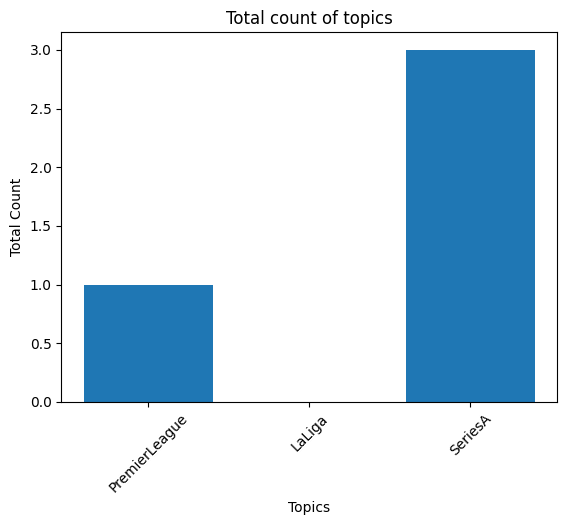

In [43]:
import matplotlib.pyplot as plt

topic_counts = [soccer_df['PremierLeague'].sum(), soccer_df['LaLiga'].sum(), soccer_df['SeriesA'].sum()]
topic_labels = ['PremierLeague', 'LaLiga','SeriesA']

plt.bar(topic_labels, topic_counts)

# Customize the plot
plt.xlabel('Topics')
plt.ylabel('Total Count')
plt.title('Total count of topics')
plt.xticks(rotation=45)

# Show the plot
plt.show()